# Chi Square Test of Independence

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2
from scipy.stats import chi2_contingency

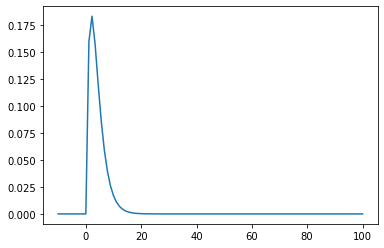

In [13]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

## Loading the Data

In [2]:
data = pd.read_csv('data/adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Ques- Is there a relationship between occupation and gender? (or does the preference of occupation depend on the gender)

In [5]:
data.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [6]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

## Understanding the Chi2 Test

Lets make a bold Claim that **Gender** and **Occupation** are dependent.

Step - 1:  
i.e. Alternate Hypothesis: $$ H_1: They \ are \ Dependent $$
and Null Hypothesis: $$ H_0: They \ are \ Independent $$

Step - 2:  
* Collect the sample of size n
* Compute the sample frequencies

Step - 3: Compute $ \chi^2 $ test statistic  
Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.
* Have a look at Observed Frequencies (in the sample)
* Compute the Expected Frequencies (under null hyp assumption) $$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$
Now, test statistic can be computed using below mentioned formula: $$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$

Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule  
* Chi Square Test $$ if \ \chi^2 > \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$
* p-value Test $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [32]:
# Step - 2 => Looking at the freqency distribution

pd.crosstab(data.occupation, data.gender, margins=True)

gender,Female,Male,All
occupation,,,
?,1273,1536,2809
Adm-clerical,3769,1842,5611
Armed-Forces,0,15,15
Craft-repair,323,5789,6112
Exec-managerial,1748,4338,6086
Farming-fishing,95,1395,1490
Handlers-cleaners,254,1818,2072
Machine-op-inspct,804,2218,3022
Other-service,2698,2225,4923


In [34]:
# These are the observed frequencies

observed = pd.crosstab(data.occupation, data.gender)

observed

gender,Female,Male
occupation,,
?,1273,1536
Adm-clerical,3769,1842
Armed-Forces,0,15
Craft-repair,323,5789
Exec-managerial,1748,4338
Farming-fishing,95,1395
Handlers-cleaners,254,1818
Machine-op-inspct,804,2218
Other-service,2698,2225


In [35]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(8789.50801388705,
 0.0,
 14,
 array([[ 931.233938  , 1877.766062  ],
        [1860.14725032, 3750.85274968],
        [   4.97276934,   10.02723066],
        [2026.2377462 , 4085.7622538 ],
        [2017.61827935, 4068.38172065],
        [ 493.96175423,  996.03824577],
        [ 686.90520454, 1385.09479546],
        [1001.8472626 , 2020.1527374 ],
        [1632.06289669, 3290.93710331],
        [  80.22734532,  161.77265468],
        [2046.12882355, 4125.87117645],
        [ 325.88215061,  657.11784939],
        [1824.67482904, 3679.32517096],
        [ 479.37496417,  966.62503583],
        [ 780.72478604, 1574.27521396]]))

In [43]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [112]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

22.307129581578693

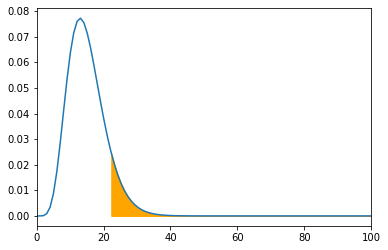

In [113]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='orange')

In [56]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [57]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis
